## Importing Dataset

In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

apps_df = pd.read_csv(r"C:\Users\Mohamed_Sameer\Downloads\archive\datasets\apps.csv")  
reviews_df = pd.read_csv(r"C:\Users\Mohamed_Sameer\Downloads\archive\datasets\user_reviews.csv")  


display(apps_df.head())
display(reviews_df.head())


Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  January 15, 2018   
2       Everyone               Art & Design    August 1, 2018   
3           Teen               Art & Design      June 8, 2018   
4       Everyone    Art & Design;Creativity     June 20, 2018   

          Current Ver   Android Ver  
0               1.0.0  4.0.3 and up  
1               2.0.0  4.0.3 and up  
2               1.2.4  4.0.3 and up  
3  Varies with device    4.2 and up  
4                 1.1    4.4 and up

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

## Data Cleaning

In [93]:
import pandas as pd
import numpy as np

def convert_size(size):
    
    if isinstance(size, str):
        size = size.strip().upper()
        if 'K' in size:
            return float(size.replace('K', '')) * 1024  
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024**2  
        elif 'G' in size:
            return float(size.replace('G', '')) * 1024**3  
        elif 'B' in size:
            return float(size.replace('B', ''))  
    return np.nan  


def convert_price(price):
    if isinstance(price, str):
        price = price.replace('$', '').replace(',', '')
        try:
            return float(price) if price else 0
        except ValueError:
            return np.nan  
    return np.nan


apps_df = pd.read_csv(r"C:\Users\Mohamed_Sameer\Downloads\archive\datasets\apps.csv")  # Apps dataset


apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')
apps_df['Size'] = apps_df['Size'].apply(lambda x: convert_size(x))  # Convert size to bytes
apps_df['Price'] = apps_df['Price'].apply(lambda x: convert_price(x))  # Clean price format
apps_df.dropna(subset=['Category'], inplace=True)  # Remove rows where Category is missing


apps_df.head()


Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type  Price  \
0  ART_AND_DESIGN     4.1      159   NaN      10,000+  Free    0.0   
1  ART_AND_DESIGN     3.9      967   NaN     500,000+  Free    0.0   
2  ART_AND_DESIGN     4.7    87510   NaN   5,000,000+  Free    0.0   
3  ART_AND_DESIGN     4.5   215644   NaN  50,000,000+  Free    0.0   
4  ART_AND_DESIGN     4.3      967   NaN     100,000+  Free    0.0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  January 15, 2018   
2       Everyone               Art & Design    August 1, 2018   
3           Teen               Art & Design      June 8, 2018   
4       Everyone    Art & Design;Creativity     June 20, 2018   

          Current Ver   Android Ver  
0               1.0.0  4.0.3 and up  
1               2.0.0  4.0.3 and up  
2               1.2.4  4.0.3 and up  
3  Varies with device    4.2 and up  
4                 1.1    4.4 and up

## Exploratory Data Analysis

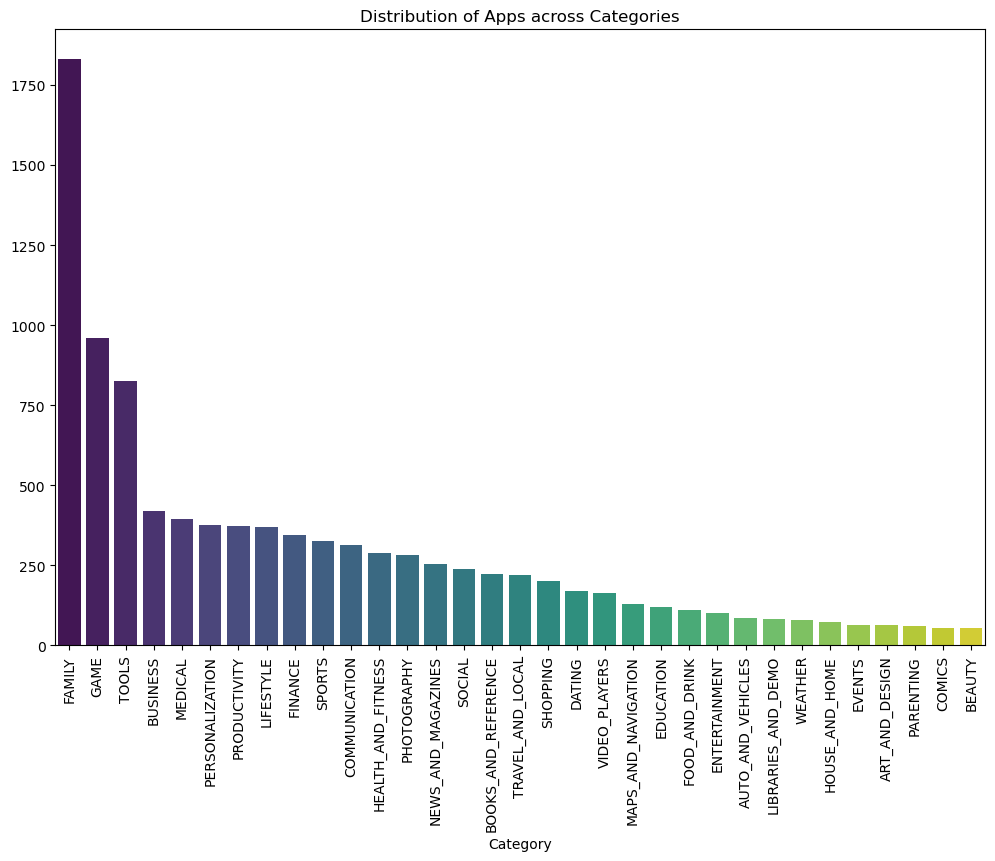

In [95]:

category_counts = apps_df['Category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Apps across Categories')
plt.xticks(rotation=90)
plt.show()




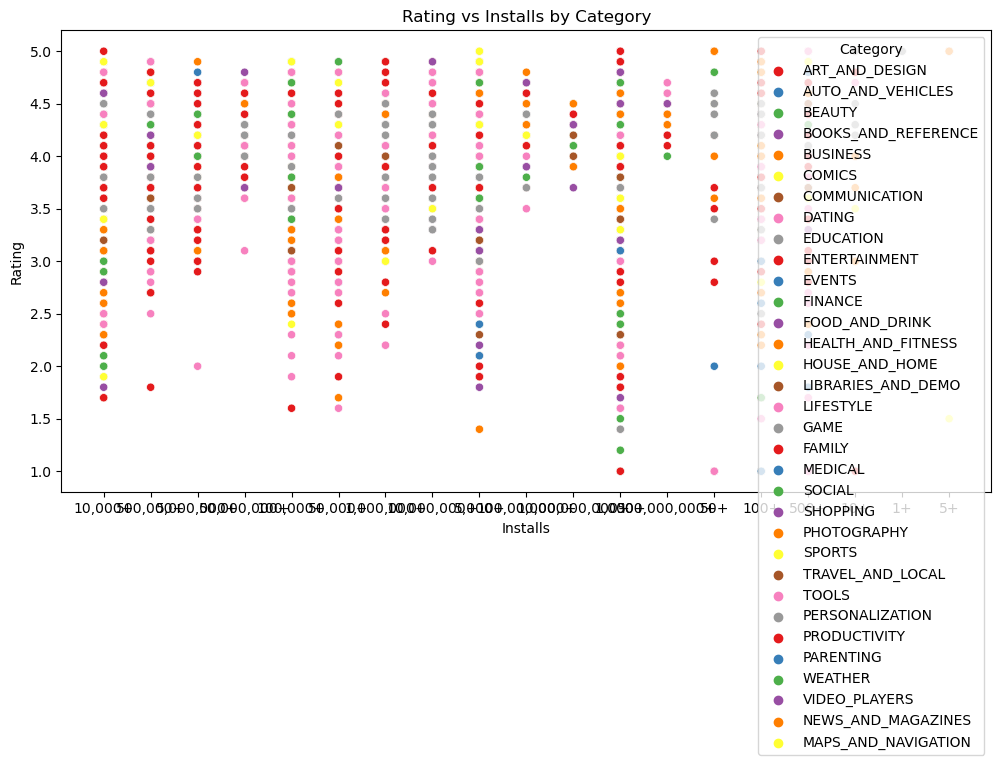

In [75]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=apps_df, x='Installs', y='Rating', hue='Category', palette='Set1')
plt.title('Rating vs Installs by Category')
plt.show()

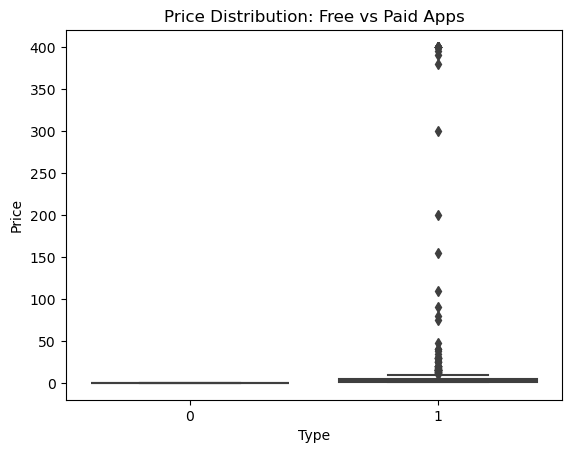

In [77]:
apps_df['Type'] = LabelEncoder().fit_transform(apps_df['Type'])  # Encode Free/Paid as 0/1
sns.boxplot(x='Type', y='Price', data=apps_df)
plt.title('Price Distribution: Free vs Paid Apps')
plt.show()


## Sentiment Analysis

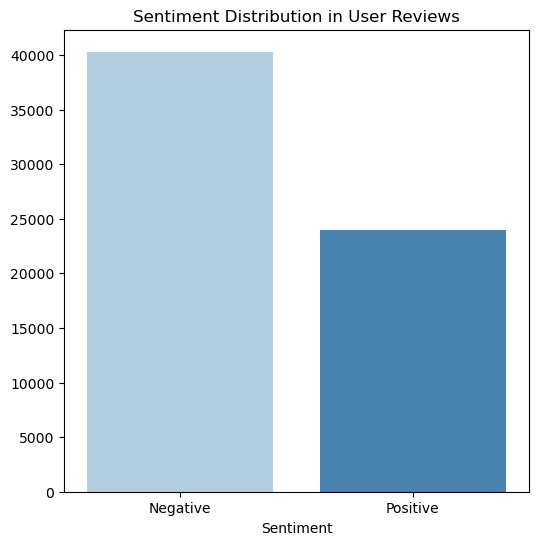

In [97]:

reviews_df['Sentiment_Polarity'] = pd.to_numeric(reviews_df['Sentiment_Polarity'], errors='coerce')


reviews_df['Sentiment'] = reviews_df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


sentiment_count = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Blues')
plt.title('Sentiment Distribution in User Reviews')
plt.show()



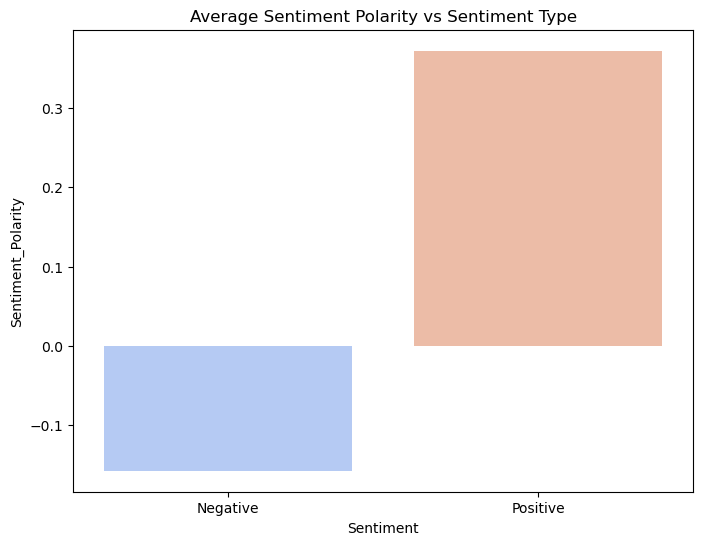

In [99]:

sentiment_avg_rating = reviews_df.groupby('Sentiment')['Sentiment_Polarity'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Sentiment_Polarity', data=sentiment_avg_rating, palette='coolwarm')
plt.title('Average Sentiment Polarity vs Sentiment Type')
plt.show()


## Interactive Visualization

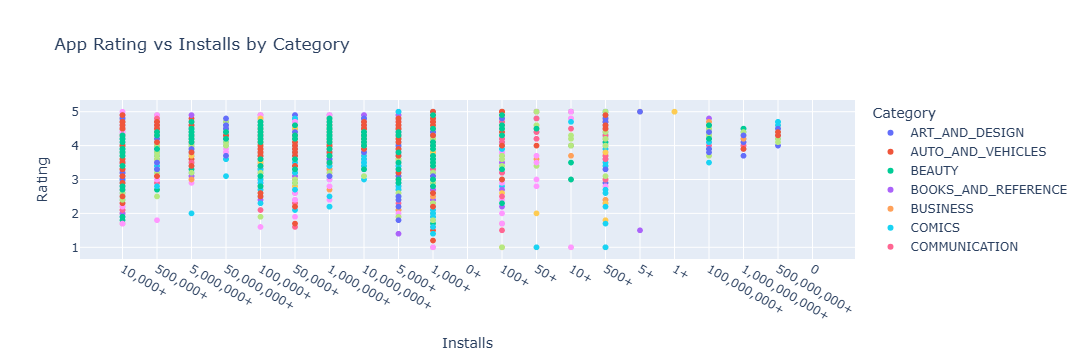

C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128044 (\N{DOLPHIN}) missing from current font.

C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.

C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from current font.

C:\Users\Mohamed_Sameer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 65293 (\N{FULLWIDTH HYPHEN-MINUS}) missing from current font.



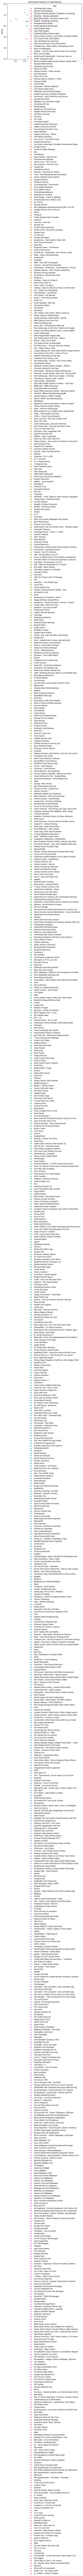

In [107]:

fig = px.scatter(apps_df, x='Installs', y='Rating', color='Category', hover_data=['App', 'Size'], title="App Rating vs Installs by Category")
fig.show()


app_sentiment = reviews_df.groupby('App')['Sentiment_Polarity'].mean().reset_index()
app_sentiment = pd.merge(apps_df[['App', 'Rating']], app_sentiment, on='App', how='inner')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=app_sentiment, hue='App')
plt.title('Sentiment Polarity vs App Rating')
plt.show()
